# Deciphering the Public Opinion on Apple

Conducting a Twitter sentiment analysis for the SXSW Conference

# INTRODUCTION, PROBLEM STATEMENT, and BUSINESS UNDERSTANDING

As digital brand advisors, we have been hired by Apple with the goal of conducting an analysis that assesses public opinion about the company based on a [Twitter sentiment analysis](https://data.world/crowdflower/brands-and-product-emotions) in the South by Southwest (SXSW) conference, which celebrates the [convergence of tech and other critical societal factors like education and culture.](https://www.sxsw.com/about/).

One medium that companies can leverage to identify public opinion about their products and activities in social media platforms like Twitter. People from all walks of life share their varied opinions surrounding businesses, making Twitter a perfect source of data to obtain public sentiment. 

For this project, Apple requires us to conduct a sentiment analysis of tweets presented during the SXSW Conference. Below are the objectives of our analysis: 

# OBJECTIVES

1. Determine how Apple is perceived as a company based on the tweets presented during the SXSW Conference, in comparison to Google which is one of their main competitors.
2. Determine consumers' reactions to Apple's SXSW announcement (how are their new products perceived, and how do people react to new announcements?)
3. Seek out insights that the tweets can give into the challenges that Apple faces during these product announcements. Are there specific challenges that should be addressed?
4. Create a model that when given a tweet or series of tweets can determine the user's sentiment (positive, negative, or neutral). Apple can use these models to assess public opinion and stay ahead of its competition. 

# DATA UNDERSTANDING

We will be using a dataset from [data.world provided by CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions/file/judge-1377884607_tweet_product_company.csv) which has tweets about Google and Apple from a conference. The tweet labels were crowdsources and reflect the emotion they convey and what product/service/company the emotion is directed at based on the content.

Contributors evaluated tweets about multiple brands and products. The crowd was asked if the tweet expressed positive, negative, or no emotion towards a brand and/or product. If some emotion was expressed they were also asked to say which brand or product was the target of that emotion.

## Data Limitations

Twitter is full of spelling errors, shortened words, hashtags, acronyms, tags, and very specific nouns and words. These are difficult for a model to learn. 

Emotions are also complicated and a tweet can have a mix of emotions or ambuguity. 

Emotions are also relative. For example, the phrase "IPhones are better than Android phones" could be negative or positive depending on the perception. 

A model also learns as well as its labels and our data was labelled by humans. 

These considerations make the problem tricky but the model was successful in classifying the tweets. 

Our dataset has highly imbalanced target values(emotions), which means that we will have to address this during the modeling stage

In [365]:
import pandas as pd

# DATA LOADING

In [366]:
file_path = 'data/judge-1377884607_tweet_product_company.csv'

df = pd.read_csv(file_path, encoding='latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


Since the column names are too long and difficult to read, we can rename them to ease readability and interpretability.

In [367]:
df.columns = ['Tweet', 'Product/Brand', 'Emotion']
df.head()

,Tweet,Product/Brand,Emotion
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


We can take a look at the unique values in the Brand/Product and Emotion columns to see what we have

In [368]:
df['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [369]:
df['Product/Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

We can see that there is a lot of information on different products and services (mainly Apple products and services, Google, Android, Androis Apps, and NaN) and an 'I can't tell emotion'.

# DATA CLEANING

## Addressing Missing Values

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


We are missing the body of text for 1 tweet and 5802 tags for the product/company that the tweet was about. Let's start by looking at the missing tweet.

In [371]:
df[df['Tweet'].isna()]

,Tweet,Product/Brand,Emotion
6,NaN,NaN,No emotion toward brand or product


All the information from this row is missing, including the tweet itself, so we can drop it. 

In [372]:
df = df.drop([6])
df[df['Tweet'].isna()]


,Tweet,Product/Brand,Emotion


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


Now let's look at the missing values in the product/company column

In [374]:
df[df['Product/Brand'].isna()].head(10)

,Tweet,Product/Brand,Emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store - http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register for #GDGTLive and see Cobra iRadar for Android. {link}",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
34,Anyone at #SXSW who bought the new iPad want to sell their older iPad to me?,NaN,No emotion toward brand or product
35,"At #sxsw. Oooh. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link}",NaN,No emotion toward brand or product
37,SPIN Play - a new concept in music discovery for your iPad from @mention &amp; spin.com {link} #iTunes #sxsw @mention,NaN,No emotion toward brand or product
39,VatorNews - Google And Apple Force Print Media to Evolve? {link} #sxsw,NaN,No emotion toward brand or product
41,"HootSuite - HootSuite Mobile for #SXSW ~ Updates for iPhone, BlackBerry &amp; Android: Whether youÛªre getting friend... {link}",NaN,No emotion toward brand or product
42,Hey #SXSW - How long do you think it takes us to make an iPhone case? answer @mention using #zazzlesxsw and weÛªll make you one!,NaN,No emotion toward brand or product


The tweets are not directed towards a specific product or brand or a generally talking about the SXSW event or something related to the event with no specific feeling.

In [375]:
print("Value Counts of emotion of entire dataset \n")
display(df['Emotion'].value_counts())
print("\n\n Value Counts of emotion of dataset with no product attached")
display(df[df['Product/Brand'].isna()]['Emotion'].value_counts())

Value Counts of emotion of entire dataset 



No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64



 Value Counts of emotion of dataset with no product attached


No emotion toward brand or product    5297
Positive emotion                       306
I can't tell                           147
Negative emotion                        51
Name: Emotion, dtype: int64

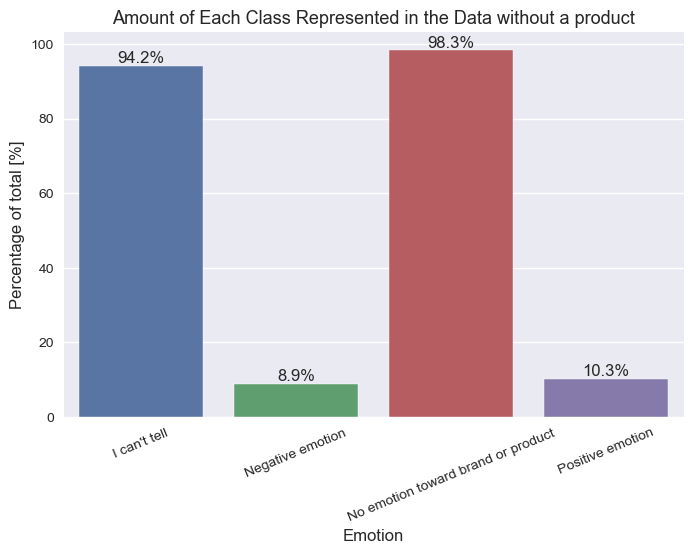

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

full_counts = df['Emotion'].value_counts()
subbed_counts = df[df['Product/Brand'].isna()]['Emotion'].value_counts()

#Displaying percentage of values for each class that come from subbed set
percentage_counts = subbed_counts/full_counts

plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
bp = sns.barplot(x=list(percentage_counts.keys()), y= percentage_counts*100)

bp.set_ylabel('Percentage of total [%]', fontsize=12)
bp.set_xlabel('Emotion', fontsize=12)
bp.set_xticklabels(labels=list(percentage_counts.keys()), rotation=22.5)
bp.set_title("Amount of Each Class Represented in the Data without a product", fontsize=13)

for patch in bp.patches:
    x = patch.get_bbox().get_points()[:,0]
    y = patch.get_bbox().get_points()[1,1]
    bp.annotate("{:.1f}%".format(y), (x.mean(), y),\
            ha= 'center', va= 'bottom', fontsize= 'large') 

plt.show()

This shows that when no product is discerned, it is more likely that there is no emotion directed towards a product or one cannot tell what the emotion is. We can fill the null values with "Unknown" as a placeholder for the time being. The data missing in product/brand name has some value and information in the fact that it is missing. Most of the tweets that have no emotion are in this category and they will be left as unknown.

In [377]:
df['Product/Brand'].fillna('Unknown', inplace = True)

In [378]:
# Verifying that the null values have been handled
df.isna().sum()

Tweet            0
Product/Brand    0
Emotion          0
dtype: int64

## Cleaning the Emotion Column

In [379]:
df['Emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64

Similar to the initial column names, the values in the emotion column can be cleaned up for interpretability and to reduce the time required to type the code

In [380]:
emotion_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative', 'No emotion toward brand or product': 'Neutral', "I can't tell": 'Unknown'}
df['Emotion'] = df['Emotion'].map(emotion_dict)
df.head()

,Tweet,Product/Brand,Emotion
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive


In [381]:
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Unknown      156
Name: Emotion, dtype: int64

Now let's look at the tweets with 'Unknown' emotion values to see if we notice any patterns or can easily tell whether the tweet has a negative, positive, or neutral emotion.

In [382]:
pd.set_option("display.max_colwidth", 300)
df[df['Emotion']=='Unknown']

,Tweet,Product/Brand,Emotion
90,Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh,Unknown,Unknown
102,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,Unknown,Unknown
237,"Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Unknown
341,The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw,Unknown,Unknown
368,Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link},Unknown,Unknown
...,...,...,...
9020,It's funny watching a room full of people hold their iPad in the air to take a photo. Like a room full of tablets staring you down. #SXSW,Unknown,Unknown
9032,"@mention yeah, we have @mention , Google has nothing on us :) #SXSW",Unknown,Unknown
9037,"@mention Yes, the Google presentation was not exactly what I was expecting. #sxsw",Unknown,Unknown
9058,&quot;Do you know what Apple is really good at? Making you feel bad about your Xmas present!&quot; - Seth Meyers on iPad2 #sxsw #doyoureallyneedthat?,Unknown,Unknown


These tweets are difficult to classify without more context. Some of them could be taken as genuine or sarcastic depending on the context.

Since we need labels for our models, the tweets will not be usefulfor model development. Luckily, they make up a small percentage of our data so we can drop these rows. 

In [383]:
df = df[df['Emotion']!='Unknown']
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Name: Emotion, dtype: int64

Also, the emotion column is highly imbalanced, which will have to be dealt with in the modelling stage

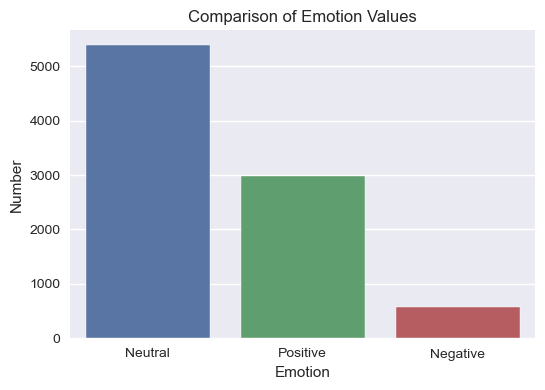

In [384]:
plt.figure(figsize=(6,4))
import seaborn as sns

comp = sns.countplot(data=df, x = 'Emotion', order = df['Emotion'].value_counts().index)
comp.set_title("Comparison of Emotion Values")
comp.set_ylabel("Number")
comp.set_xlabel('Emotion')
plt.show()


## Dealing with Duplicates

In [385]:
len(df[df.duplicated()])

22

There are 22 tweets in the dataset that are duplicated. Let's take a closer look at them

In [386]:
df[df.duplicated()]

,Tweet,Product/Brand,Emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive
776,"Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Neutral
2232,Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,Unknown,Neutral
2559,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive
3950,Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW,Android App,Positive
3962,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive
4897,"Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!",iPad or iPhone App,Positive
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter,Unknown,Neutral
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, not fuss! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter",Unknown,Neutral
5881,"RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Neutral


In [387]:
df.drop_duplicates(keep='first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8914 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          8914 non-null   object
 1   Product/Brand  8914 non-null   object
 2   Emotion        8914 non-null   object
dtypes: object(3)
memory usage: 278.6+ KB


We can now perform EDA on the data

# EDA

With the objectives in mind, we need to isolate and analyze positive and negative tweets as a whole and on a company and product basis. We will start with positive tweets.

## Tweets with Positive Sentiment

In [388]:
# creating a new df for the positive tweets
df_positive = df[df['Emotion']=='Positive']
# Verifying that the negative and neutral tweets have been removed
df_positive['Emotion'].value_counts()

Positive    2970
Name: Emotion, dtype: int64

In [389]:
# Parsing the tweets into a list
corpus_pos = df_positive['Tweet'].to_list()
corpus_pos[0:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB']

### Tokenizing

We will use TweetTokenizer throughout this project since it has a built-in functionality like processing hashtags and handles correctly unlike other tokenizers. We will drop all handles from the tweets since we are focused on the content of the tweet.

In [390]:
from nltk import TweetTokenizer
import string

# function for the tokenization of the tweets
def tokenize_tweets(corpus, preserve_case = False, strip_handles = True):
    """Function returns tokens based on a corpus passed in. The corpus will be broken
    doen into tokens based on TweetTokenizer from the nltk package.
    -----------------------
    Arguments:
    corpus: the collection of words to be tokenized in a corpus format.
    preserve_case: whether to keep the upper case letters in the words as upper case.
    strip_handles: whether to remove Twitter handles"""

    tokenizer = TweetTokenizer(preserve_case= preserve_case,
                               strip_handles= strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [391]:
# Tokenize positive tweets
tokens_pos = tokenize_tweets(corpus_pos)

In [392]:
# Displaying the 10 most frequent tokens
from nltk import FreqDist
freq_pos = FreqDist(tokens_pos)
freq_pos.most_common(10)

[(',', 4050),
 ('#sxsw', 2983),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1214),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019)]

The tokens contain a lot of punctuation and stop words like "at" and "the" because we have not removed these yet. Before removing them, we will be lemmatizing the tokens to ensure that we are capturing any stop words that could be generated using this process.

### Lemmatization

In [393]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

# function for the lemmatization of tokens
def lemmatize_tokens(tokens_list):
    """Function lemmatizes tokens list that is passed in using WordNetLemmatizer
    and returns lemmatized tokens.
    --------------------
    Arguments:
    tokens_list: a tokens list"""
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rosew\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [394]:
# Lemmatizing positive tweets tokens
tokens_pos_lemm = lemmatize_tokens(tokens_pos)

In [395]:
# displaying the 10 most common tokens
freq_pos_lemmatized = FreqDist(tokens_pos_lemm)
freq_pos_lemmatized.most_common(10)

[(',', 4050),
 ('#sxsw', 2983),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1218),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019)]

We still have punctuation and stop words in our list as we have not removed them yet. We can now remove them after lemmatizing our tokens since they do not reveal anything about the sentiment of the tweets. We will see more relevant information and allow for bettwe performance of our models.

### Stop Word and Punctuation Removal

In [396]:
# Getting stop words from NLTK
from nltk.corpus import stopwords
stop_list = stopwords.words('english')
stop_list += list(string.punctuation)

# Adding additional characters and empty strings to stop words
additional_punctuation = ['“','”','...',"''",'’','``','']
stop_list += additional_punctuation

In [397]:
# Function for the removal of stop words
def remove_stop_words(tokens, stop_list = stop_list):
    """Function removes stop words from a given tokens list 
    based on a stop word list
    ----------------------
    Arguments: 
    tokens: a tokens list
    stop_list: a list containing stop words to be removed from tokens"""

    # encoding or decoding tojens to remove unrecognized symbols and 
    # eliminate external links
    tokens_stopped = [word.encode('ascii', 'ignore').decode()
                      for word in tokens
                      if (word not in stop_list) &
                      (word.startswith('http')== False)]
    return tokens_stopped

In [398]:
# Removing stop words from lemmatized tokens
tokens_pos_list = remove_stop_words(tokens_pos_lemm)

In [399]:
# 50 most common tokens
freq_stop_words_removed = FreqDist(tokens_pos_list)
freq_stop_words_removed.most_common(50)

[('#sxsw', 2983),
 ('link', 1218),
 ('ipad', 1010),
 ('rt', 931),
 ('apple', 711),
 ('google', 602),
 ('2', 595),
 ('store', 554),
 ('iphone', 466),
 ('', 443),
 ('app', 387),
 ('new', 358),
 ('austin', 250),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 161),
 ('party', 151),
 ('pop-up', 151),
 ('sxsw', 144),
 ('line', 143),
 ('time', 136),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 124),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 115),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 112),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('#sxswi', 96),
 ('awesome', 93),
 ('#ipad', 93),
 ('love', 93),
 ('good', 92),
 ('network', 91),
 ('mobile', 90),
 ('temporary', 89),
 ('downtown', 88)]

It is clear that we still have some words that do not have valuable information surrounding the sentiment of the tweets. We know that SXSW refers to the conference and can remove all words surrounding this. Also, words like link and rt could be referring to retweets and external lunks. However, since link could have its literal meaning, we will build a function that takes a random sample of the tweets to see whether rt and link appear there and assess their usage.

In [400]:
# Adding sxsw to the stop word list
stop_list += ['#sxsw', '#sxswi', 'sxsw']

In [401]:
# defining a function that will provide context for given words

import numpy as np
def context_finder(word, corpus, n_samples =5, n_count = 5):
    """This function takes n_samples with each sample having n_count tweets
    from the given corpus, and displays the tweets that have the specified
    word in them. The goal of the function us to get some context about a word.
    --------------------------
    Arguments:
    word: a word that the function will be providing context for 
    corpus: a document that the word is contained in
    n_samples: how many samples will be collected
    n_count: how many tweets each sample will contain """

    i = 0
    for _ in list(range(0,n_samples)):
        sample = np.random.choice(corpus, n_count)
        for tweet in sample:
            if word in tweet:
                print(tweet)
                i+=1
    print('------------------------')
    print(f'Out of {n_count*n_samples} tweets analyzed, \
          {i} tweets had the word "{word}" in them.')

In [402]:
#verifying that 'link' is used in reference to external web links
context_finder('link', corpus_pos)

Google to Launch Major New Social Network Called Circles  {link} #sxsw (via @mention
The iPad 2 Takes Over #SXSW [VIDEO] {link}
Big night: Come party down with @mention and Google tonight at #sxsw: {link} Bands, food, art, interactive maps! cc: @mention
Pic of my iPad-winning performance: {link} #sxsw #accordion #toodamnlucky
Updated NPR Music iPhone app has song info for All Songs 24/7 &amp; live video streaming just in time for #SXSW {link}
RT @mention Apple set to open popup shop in core of SXSW action {link} via @mention #SXSW
RT @mention Genius move by Apple to open a temp. store in downtown Austin for #SXSW: {link} /via @mention #ipad2
Love it . RT @mention From #Apple to Naomi Campbell: pop-up stores are all the rage: {link} #sxsw
#IPad2 's Û÷#SmartCoverÛª Opens to Instant Access - I should have waited to get one! - {link} #apple #SXSW
Blogger is about due for an update... Google finally takes action and will showcase the new design at #SXSW {link}
Report: 5th Avenue Apple Sto

It is clear that the word link mainly refers to web links that were removed when the data was being input int the dataset. This does not give valuable insight into what the tweet is about, and we will add the word to our stop words list

In [403]:
stop_list += ["link"]

let's look at RT

In [404]:
context_finder('RT', corpus_pos)

Here he comes ladies! @mention  @mention  RT @mention I'll be at Austin Convention Center w/  @mention showing my  iPhone game. #SXSW
Fab! RT @mention RT @mention So @mention just spilled the beans: next platform 4 #Flipboard is the iPhone.workin on it. #sxflip #SXSW #SXSWi
RT @mention More #SXSW Awesomeness! Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link}
@mention -&gt; RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW (cont) {link}
Fear not! Now extended through Wed! --&gt; RT @mention RT @mention Last day for Apple popup is Sunday 3/13 #SXSW #AppleATXdt
RT @mention Better get in line now. RT @mention Apple is opening up a temp store in downtown Austin for #SXSW &amp; iPad 2 launch {link}
RT @mention Announcing SXSW Quotables, a crowd-curated feed of the hottest quotes from #SXSW. Sign up to win an iPad 2! - {link} #ipad2
RT @mention This is why social technology is amazing: Google has set up a Per

This also needs to be added to our tokenizer list since it denotes a retweet.

In [405]:
stop_list += ['rt']

In [406]:
# Let's now update our tokens list
tokens_pos_list = remove_stop_words(tokens_pos_list, stop_list=stop_list)

### The 50 Most Frequent Words in Positive Tweets

In [407]:
final_50_most_freq_pos = FreqDist(tokens_pos_list)
final_50_most_freq_pos.most_common(50)

[('ipad', 1010),
 ('apple', 711),
 ('google', 602),
 ('2', 595),
 ('store', 554),
 ('iphone', 466),
 ('app', 387),
 ('new', 358),
 ('austin', 250),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 161),
 ('party', 151),
 ('pop-up', 151),
 ('line', 143),
 ('time', 136),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 124),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 115),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 112),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('awesome', 93),
 ('#ipad', 93),
 ('love', 93),
 ('good', 92),
 ('network', 91),
 ('mobile', 90),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('people', 82),
 ('open', 82),
 ('#iphone', 82),
 ('got', 81),
 ('apps', 78)]

We can see that the most common words include "apple" and "google", but there are other words like "launch", "store", and "pop-up" show more about what the people were excited about. However, we can use a word cloud to show all these words. 

### Wordcloud with Product/Brand Information for Positive Tweets

In [408]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [409]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#defining a function for wordcloud generation
def generate_wordcloud(tokens, collocations=False, background_color='black', 
                       colormap='Greens', display=True):
    
    """Function generates and returns a wordcloud based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    collocations: Whether to include collocations (bigrams) of two words
    background_color: background color of the resulting word cloud
    colormap: the color map for the words that will be in the word cloud
    display: Whether to show the resulting wordcloud"""
    
    ## Initalize a WordCloud
    wordcloud = WordCloud(collocations=collocations, 
                          background_color=background_color, 
                          colormap=colormap, 
                          width=500, height=300)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    ## Plot with matplotlib
    if display:
        plt.figure(figsize = (8, 6), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis('off');
    return wordcloud

We will start by generating a word cloud for the tokens we were looking at above

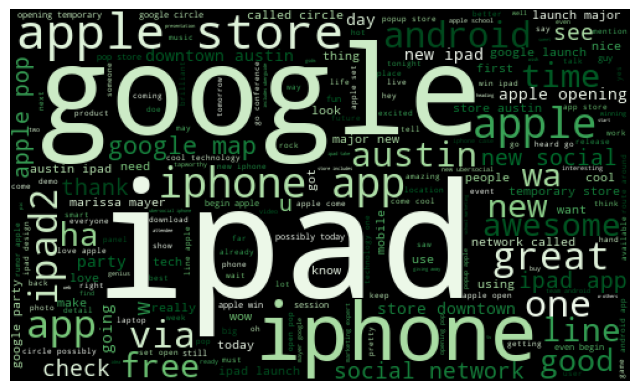

In [410]:
# Generating the word cloud
cloud_positive_all = generate_wordcloud(tokens_pos_list, collocations=True)

This shows us what the public was tweeting about in a positive way. We see that a lot of people are excited about the iPad, iPhone, and iPad 2 launch. It is also clear that people are tweeting about Apple and Google. To find additional common words through the word cloud that are not related to Apple , Google, iPhone, iPad 2, android, and others, we can remove them and visualize.

In [411]:
#removing product/company names
stop_lst_no_comp = stop_list + ['iphone', 'ipad', 'iphone app', 'google', 'android', 'apple',
                               '#apple', '#google', '#ipad', '#iphone']

tokens_pos_list = remove_stop_words(tokens_pos_list, stop_list=stop_lst_no_comp)

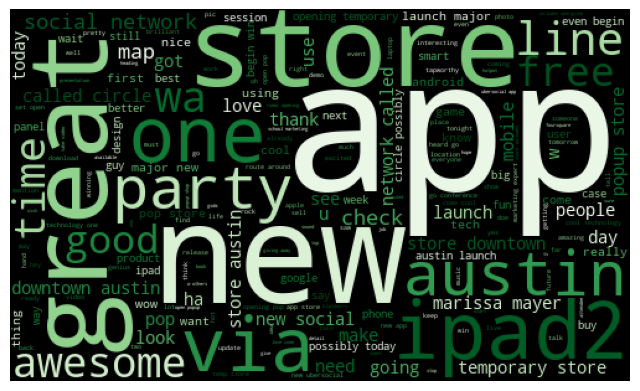

In [412]:
cloud_positive_without_company = generate_wordcloud(tokens_pos_list, collocations=True)

### N-grams of Positive Reviews

### Positive Bigrams and Trigrams

In [413]:
from nltk.collocations import *
bigrams_measures = nltk.collocations.BigramAssocMeasures()
trigrams_measures = nltk.collocations.TrigramAssocMeasures()

In [414]:
# initializing finders
finder_bi_pos = BigramCollocationFinder.from_words(tokens_pos_list)
finder_tri_pos = TrigramCollocationFinder.from_words(tokens_pos_list)

In [415]:
# Getting frequency information from finder
bigrams = finder_bi_pos.score_ngrams(bigrams_measures.raw_freq)
trigrams = finder_tri_pos.score_ngrams(trigrams_measures.raw_freq)

In [416]:
bigrams[:30]

[(('pop-up', 'store'), 0.004340211680499505),
 (('social', 'network'), 0.0032741947765171707),
 (('temporary', 'store'), 0.00304576258280667),
 (('new', 'social'), 0.00293154648595142),
 (('store', 'downtown'), 0.0026650422599558366),
 (('downtown', 'austin'), 0.002626970227670753),
 (('2', 'launch'), 0.002208177872534836),
 (('called', 'circle'), 0.0021701058402497525),
 (('network', 'called'), 0.0021701058402497525),
 (('marissa', 'mayer'), 0.0021320338079646693),
 (('launch', 'major'), 0.002055889743394502),
 (('major', 'new'), 0.002055889743394502),
 (('popup', 'store'), 0.002055889743394502),
 (('store', 'austin'), 0.0019036016142541688),
 (('pop', 'store'), 0.0017513134851138354),
 (('austin', '2'), 0.0016370973882585853),
 (('opening', 'temporary'), 0.0016370973882585853),
 (('possibly', 'today'), 0.0015609533236884184),
 (('circle', 'possibly'), 0.001522881291403335),
 (('even', 'begin'), 0.001522881291403335),
 (('cool', 'technology'), 0.0012944490976928348),
 (('ever', 'heard

In [417]:
trigrams[:30]

[(('new', 'social', 'network'), 0.00281733038909617),
 (('store', 'downtown', 'austin'), 0.002398538033960253),
 (('social', 'network', 'called'), 0.0021701058402497525),
 (('network', 'called', 'circle'), 0.0021320338079646693),
 (('launch', 'major', 'new'), 0.002055889743394502),
 (('major', 'new', 'social'), 0.002055889743394502),
 (('opening', 'temporary', 'store'), 0.0015609533236884184),
 (('circle', 'possibly', 'today'), 0.001522881291403335),
 (('called', 'circle', 'possibly'), 0.0014848092591182517),
 (('temporary', 'store', 'downtown'), 0.0014467372268331684),
 (('austin', '2', 'launch'), 0.0013325211299779183),
 (("one's", 'ever', 'heard'), 0.0012944490976928348),
 (('downtown', 'austin', '2'), 0.0012563770654077514),
 (('cool', 'technology', "one's"), 0.001218305033122668),
 (('even', 'begin', 'win'), 0.001218305033122668),
 (('technology', "one's", 'ever'), 0.001218305033122668),
 (('ever', 'heard', 'go'), 0.0011802330008375847),
 (('come', 'cool', 'technology'), 0.0011040

We can see that a lot of people are excited about a new temporary popup store downtown in Austin, the iPad 2's launch, the new social network called Circle, and Google's Marissa Mayer. 
We now have an initial understanding of positive tweets and can look at the negative ones.

## Tweets with Negative Sentiment

In [418]:
# Creating a new dataframe for negative Tweets
df_negative = df[df['Emotion']=='Negative']
df_negative['Emotion'].value_counts()

Negative    569
Name: Emotion, dtype: int64

In [419]:
# Creating a list for them
corpus_neg = df_negative['Tweet']. to_list()
corpus_neg[0:5]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '@mention  - False Alarm: Google Circles Not Coming Now\x89ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw']

### Tokenization, Lemmatization, and Removing Stop Words 

In [420]:
# tokenize tweets
tokens_negative = tokenize_tweets(corpus_neg)
# Lemmatize tweets
tokens_neg_lem = lemmatize_tokens(tokens_negative)
# Remove stop words and punctuation
tokens_neg_list = remove_stop_words(tokens_neg_lem, stop_list= stop_list)

### 50 Most Frequent Words in the Negative Tweets

In [421]:
final_50_most_freq_neg = FreqDist(tokens_neg_list)
final_50_most_freq_neg.most_common(50)

[('ipad', 179),
 ('iphone', 145),
 ('google', 136),
 ('apple', 100),
 ('2', 81),
 ('', 69),
 ('app', 60),
 ('store', 47),
 ('new', 43),
 ('like', 43),
 ('need', 35),
 ('ha', 31),
 ('circle', 29),
 ('design', 29),
 ('people', 29),
 ('social', 28),
 ('apps', 26),
 ('get', 25),
 ('wa', 24),
 ('austin', 23),
 ('think', 23),
 ('time', 23),
 ('launch', 22),
 ('one', 22),
 ('day', 21),
 ('today', 21),
 ('look', 21),
 ('line', 20),
 ('say', 20),
 ('android', 19),
 ('#ipad', 19),
 ('would', 19),
 ('network', 18),
 ('phone', 18),
 ('headache', 17),
 ('news', 17),
 ('go', 17),
 ('long', 17),
 ('product', 17),
 ("i've", 16),
 ("i'm", 16),
 ('battery', 16),
 ('user', 15),
 ('thing', 15),
 ('#apple', 15),
 ('good', 15),
 ('see', 15),
 ('much', 15),
 ('company', 15),
 ('america', 15)]

Apple, Google, iphone, ipad are common among the negative tweets. We can visualize this with a word cloud

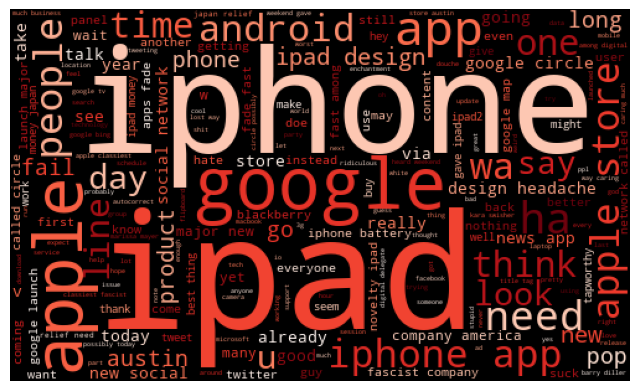

In [422]:
#generating word cloud for negative tweets
cloud_neg_with_company = generate_wordcloud(tokens_neg_list, colormap='Reds', 
                                         collocations=True)

Once again, we will remove the company names to get additional information

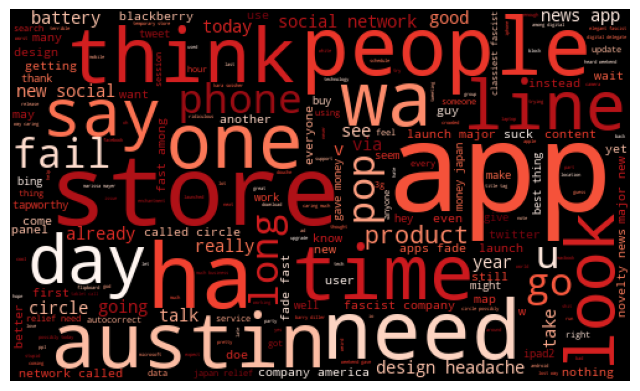

In [423]:
# Removing company/product information from the tokens
tokens_neg_list = remove_stop_words(tokens_neg_list, stop_list= stop_lst_no_comp)
# Generating the word cloud
cloud_neg_without_company = generate_wordcloud(tokens_neg_list, colormap='Reds', collocations=True)

Most negative tweets were talking about stores, apps, austin, think, fail, and pop.

### N-grams of Negative Reviews

### Negative Bigrams and Trigrams

In [424]:
from nltk.collocations import *
bigrams_measures = nltk.collocations.BigramAssocMeasures()
trigrams_measures = nltk.collocations.TrigramAssocMeasures()

In [425]:
# initializing finders
finder_bi_neg = BigramCollocationFinder.from_words(tokens_neg_list)
finder_tri_neg = TrigramCollocationFinder.from_words(tokens_neg_list)

In [426]:
# Getting frequency information from finder
bigrams_neg_all = finder_bi_neg.score_ngrams(bigrams_measures.raw_freq)
trigrams_neg_all = finder_tri_neg.score_ngrams(trigrams_measures.raw_freq)

In [427]:
bigrams_neg_all[:30]

[(('design', 'headache'), 0.003249235474006116),
 (('new', 'social'), 0.0030581039755351682),
 (('social', 'network'), 0.0028669724770642203),
 (('company', 'america'), 0.002484709480122324),
 (('fascist', 'company'), 0.0022935779816513763),
 (('major', 'new'), 0.0022935779816513763),
 (('network', 'called'), 0.002102446483180428),
 (('called', 'circle'), 0.00191131498470948),
 (('launch', 'major'), 0.00191131498470948),
 (('fade', 'fast'), 0.0017201834862385322),
 (('fast', 'among'), 0.0017201834862385322),
 (('news', 'apps'), 0.0017201834862385322),
 (('novelty', 'news'), 0.0017201834862385322),
 (('#japan', 'relief'), 0.0015290519877675841),
 (('2', 'money'), 0.0015290519877675841),
 (('best', 'thing'), 0.0015290519877675841),
 (('classiest', 'fascist'), 0.0015290519877675841),
 (('gave', '2'), 0.0015290519877675841),
 (("i've", 'heard'), 0.0015290519877675841),
 (('need', '2'), 0.0015290519877675841),
 (('relief', 'need'), 0.0015290519877675841),
 (('thing', "i've"), 0.001529051987

In [428]:
trigrams_neg_all[:30]

[(('new', 'social', 'network'), 0.002484709480122324),
 (('major', 'new', 'social'), 0.0022935779816513763),
 (('fascist', 'company', 'america'), 0.002102446483180428),
 (('social', 'network', 'called'), 0.002102446483180428),
 (('launch', 'major', 'new'), 0.00191131498470948),
 (('network', 'called', 'circle'), 0.00191131498470948),
 (('fade', 'fast', 'among'), 0.0017201834862385322),
 (('#japan', 'relief', 'need'), 0.0015290519877675841),
 (('best', 'thing', "i've"), 0.0015290519877675841),
 (('classiest', 'fascist', 'company'), 0.0015290519877675841),
 (('gave', '2', 'money'), 0.0015290519877675841),
 (('relief', 'need', '2'), 0.0015290519877675841),
 (('thing', "i've", 'heard'), 0.0015290519877675841),
 (('2', 'money', '#japan'), 0.001337920489296636),
 (('among', 'digital', 'delegate'), 0.001337920489296636),
 (('fast', 'among', 'digital'), 0.001337920489296636),
 (('money', '#japan', 'relief'), 0.001337920489296636),
 (('apps', 'fade', 'fast'), 0.0011467889908256881),
 (('called'

The new social network circle is mentioned a lot in the negative Tweets, with other comments surrounding a company being referred to a "fascist", probably Google or Apple.

## Tweets Related to Products/Brands

To analyze tweets related specifically to Google and Apple, we will engineer the company column by mapping the different values to either Google, Apple, or other brand. 

In [429]:
df['Product/Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

These will be converted to three categories: Apple, Google, and Unknown. 

In [430]:
product_replacement_dict = {'iPhone': 'Apple','iPad or iPhone App': 'Apple', 'iPad': 'Apple', 'Google': 'Google', 'Unknown': 'Unknown','Android': 'Google', 'Apple': 'Apple',
                             'Android App': 'Google','Other Google product or service': 'Google','Other Apple product or service': 'Apple' }
df['Brand'] = df['Product/Brand'].map(product_replacement_dict)
df.head()

,Tweet,Product/Brand,Emotion,Brand
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative,Apple
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative,Apple
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive,Google


In [431]:
df['Brand'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [432]:
for brand in df['Brand'].unique():
    print("----Value Counts for {}----".format(brand))
    display(df[df['Brand'] == brand]['Emotion'].value_counts())
    display(df[df['Brand'] == brand]['Emotion'].value_counts(normalize=True))
    print("\n")

----Value Counts for Apple----


Positive    1945
Negative     387
Neutral       65
Name: Emotion, dtype: int64

Positive    0.811431
Negative    0.161452
Neutral     0.027117
Name: Emotion, dtype: float64



----Value Counts for Google----


Positive    719
Negative    131
Neutral      26
Name: Emotion, dtype: int64

Positive    0.820776
Negative    0.149543
Neutral     0.029680
Name: Emotion, dtype: float64



----Value Counts for Unknown----


Neutral     5284
Positive     306
Negative      51
Name: Emotion, dtype: int64

Neutral     0.936713
Positive    0.054246
Negative    0.009041
Name: Emotion, dtype: float64

For both brands, positive reviews are more than negative ones

Now that we have only three categories, let's start with Apple

## Tweets Related To Apple

In [433]:
df_apple = df[df["Brand"]== 'Apple']
corpus_for_apple = df_apple['Tweet'].to_list()

In [434]:
# tokenize tweets
tokens_apple = tokenize_tweets(corpus_for_apple)
# Lemmatize tweets
tokens_lem_apple = lemmatize_tokens(tokens_apple)
# Remove stop words and punctuation
tokens_apple_list = remove_stop_words(tokens_lem_apple, stop_list= stop_list)

### A WordCloud with Product Information

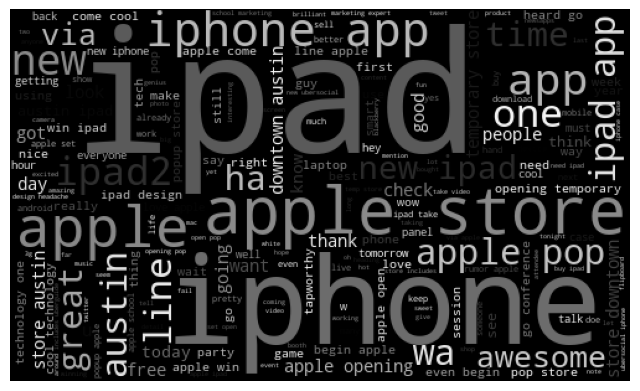

In [435]:
generate_wordcloud(tokens_apple_list, colormap="Greys", collocations=True);

### Word Cloud without Product information

We will add some other stop words to apple's list like the ipad 2 and Austin.

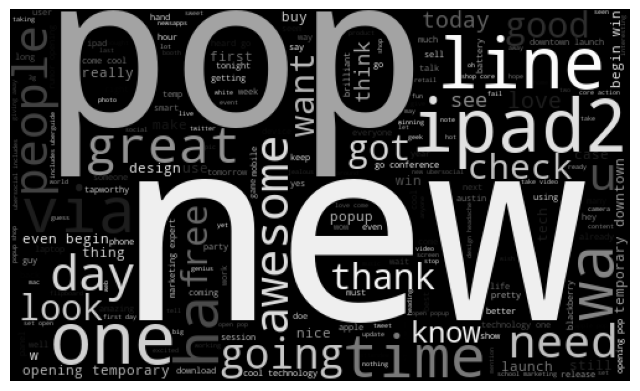

In [436]:
apple_stop_words_no_comp = stop_lst_no_comp + ['ipad 2','store', 'app', 'austin','apps']
# ['iphone', 'ipad', 'iphone app', 'google', 'android', 'apple',
#                                '#apple', '#google', '#ipad', '#iphone']
tokens_apple_list = remove_stop_words(tokens_apple_list, stop_list=apple_stop_words_no_comp)
generate_wordcloud(tokens_apple_list, colormap='Greys', collocations=True);

### Percentage of Positive, Neutral, and Negative Sentiment

Visualizing the percentage of tweets that had positive, negative, or neutral sentiments is a good way of gauging the overall sentiment towards the company.

In [437]:
df_apple_sentiments = pd.DataFrame(df_apple['Emotion'].value_counts(normalize=True)).reset_index()
df_apple_sentiments.columns = ['Emotion', 'Percentage']
display(df_apple_sentiments)
df_apple_sentiments.sort_values('Percentage', ascending=True, inplace=True)


,Emotion,Percentage
0,Positive,0.811431
1,Negative,0.161452
2,Neutral,0.027117


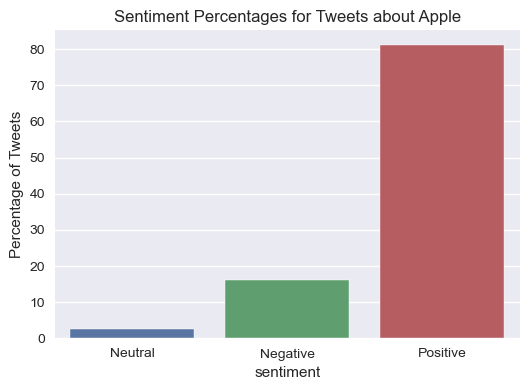

In [438]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x = df_apple_sentiments['Emotion'], y =df_apple_sentiments['Percentage']*100)
ax.set_xlabel('sentiment')
ax.set_ylabel('Percentage of Tweets')
ax.set_title('Sentiment Percentages for Tweets about Apple');


## Tweets Related To Google

In [439]:
df_google = df[df["Brand"]== 'Google']
corpus_for_google = df_google['Tweet'].to_list()

In [440]:
# tokenize tweets
tokens_google = tokenize_tweets(corpus_for_google)
# Lemmatize tweets
tokens_lem_google = lemmatize_tokens(tokens_google)
# Remove stop words and punctuation
tokens_google_list = remove_stop_words(tokens_lem_google, stop_list= stop_list)

### A WordCloud with Product Information

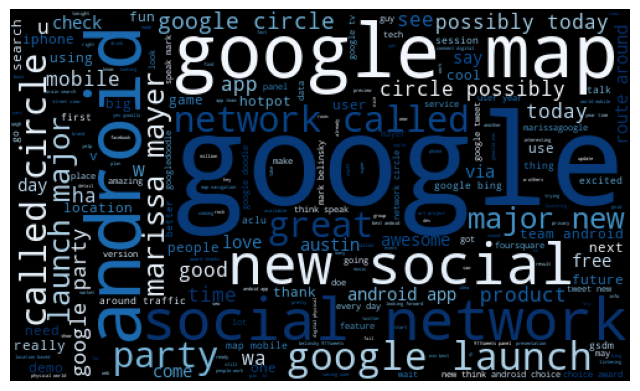

In [441]:
generate_wordcloud(tokens_google_list, colormap="Blues", collocations=True);

### Word Cloud without Product information

We will add some other stop words to Google's list.

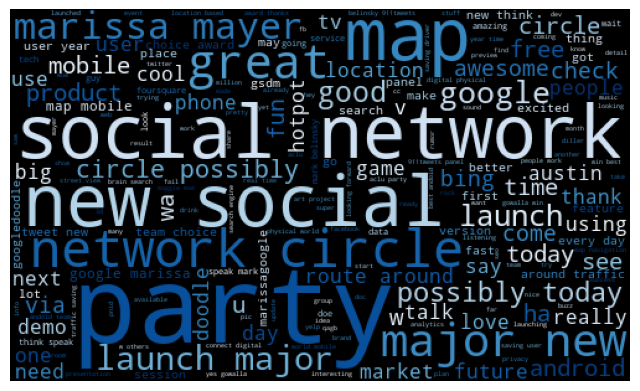

In [442]:
google_stop_words_no_comp = stop_lst_no_comp + ['app','apps', 'google','called','android','app','apps']
tokens_google_list = remove_stop_words(tokens_google_list, stop_list=google_stop_words_no_comp)
generate_wordcloud(tokens_google_list, colormap='Blues', collocations=True);

### Percentage of Positive, Neutral, and Negative Sentiment

Visualizing the percentage of tweets that had positive, negative, or neutral sentiments is a good way of gauging the overall sentiment towards the company.

In [443]:
df_google_sentiments = pd.DataFrame(df_google['Emotion'].value_counts(normalize=True)).reset_index()
df_google_sentiments.columns = ['Emotion', 'Percentage']
display(df_google_sentiments)
df_google_sentiments.sort_values('Percentage', ascending=True, inplace=True)


,Emotion,Percentage
0,Positive,0.820776
1,Negative,0.149543
2,Neutral,0.029680


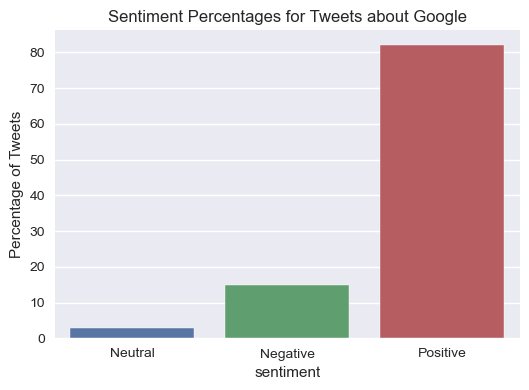

In [444]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x = df_google_sentiments['Emotion'], y =df_google_sentiments['Percentage']*100)
ax.set_xlabel('sentiment')
ax.set_ylabel('Percentage of Tweets')
ax.set_title('Sentiment Percentages for Tweets about Google');


# EDA CONCLUSIONS AND RECOMMENDATIONS

## Conclusions

### 1. Determine how Apple is perceived as a company based on the tweets presented during the SXSW Conference, in comparison to Google which is one of their main competitors.

During the SXSW conference, 81.1% of all tweets related to Apple were positive compared to Google's 82%

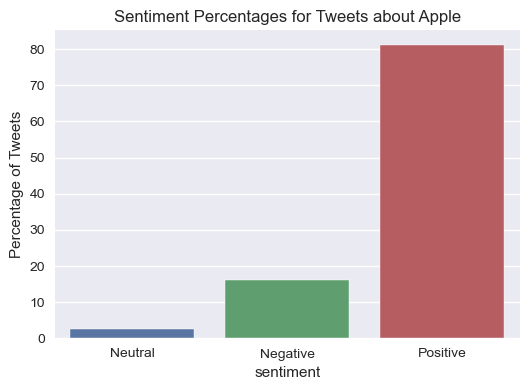

In [445]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x = df_apple_sentiments['Emotion'], y =df_apple_sentiments['Percentage']*100)
ax.set_xlabel('sentiment')
ax.set_ylabel('Percentage of Tweets')
ax.set_title('Sentiment Percentages for Tweets about Apple');

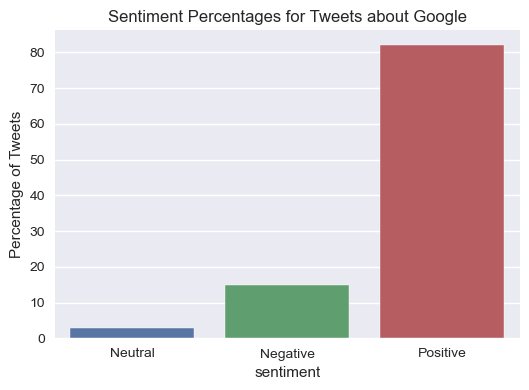

In [446]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x = df_google_sentiments['Emotion'], y =df_google_sentiments['Percentage']*100)
ax.set_xlabel('sentiment')
ax.set_ylabel('Percentage of Tweets')
ax.set_title('Sentiment Percentages for Tweets about Google');

This suggests that both companies and their products and services are mostly perceived positively.

### Diverging Sentiment Distribution for Both Brands

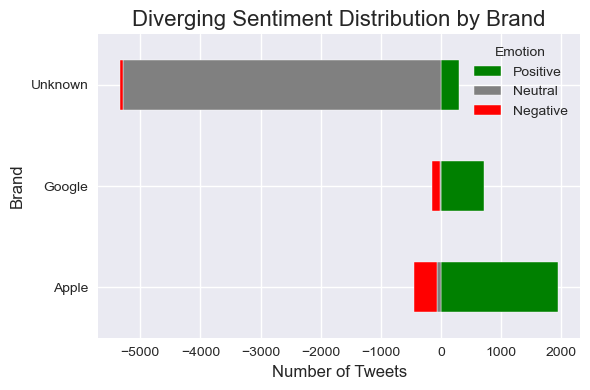

In [447]:
df_grouped = df.groupby(['Brand', 'Emotion']).size().unstack(fill_value=0)

# df

# df_grouped = df_filtered.groupby(['brand_mapped', 'emotion']).size().unstack(fill_value=0)

df_grouped['Positive'] = df_grouped['Positive'] * 1
df_grouped['Neutral'] = df_grouped['Neutral'] * -1
df_grouped['Negative'] = df_grouped['Negative'] * -1

df_grouped[['Positive', 'Neutral', 'Negative']].plot(kind='barh', stacked=True, color=['green', 'gray', 'red'], figsize=(6, 4))

plt.title('Diverging Sentiment Distribution by Brand', fontsize=16)
plt.xlabel('Number of Tweets', fontsize=12)
plt.ylabel('Brand', fontsize=12)

plt.tight_layout()
plt.show()

### 2. Determine consumers' react to Apple's SXSW announcement (how are their new products perceived, and how do people react to new announcements?)

Apple - Positives:

- Positive tweets about Apple suggest that the temporary pop-up store in downtown Austin was generally received well. 
- The iPad 2 was frequently discussed positively, with people excited about its launch. 

Apple - Negatives:

The iPhone's battery is frequently discussed in negative tweets.
- Design of the iPad was referred to as a "design headache."
- There are several references to Apple as a "fascist company."
- Several apps are referred to as "battery killer" and the design of the News app seems to have not been received positively.

## Recommendations

Based on the insights provided above, our recommendations for Apple are:
- Users are not pleased with the iPhone's batter performance, meaning that improvements should be made.
- The iPad's design should integrate more of the public's opinion.

# PREPARATION FOR MODELING

In [448]:
# Converts emotion data into numbers to use for modeling
df['Emotion'].replace({'Positive': 2, 'Negative': 1, 'Neutral': 0}, inplace = True)

In [449]:
df.head()

,Tweet,Product/Brand,Emotion,Brand
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,1,Apple
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,2,Apple
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,2,Apple
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,1,Apple
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,2,Google


## Train Test Split

To further explore the data and avoid data leakage, let's split the data into train and test sets and hold out the latter for final evaluation.

In [450]:
from sklearn.model_selection import train_test_split

X = df['Tweet']
y = df['Emotion']

In [451]:
X.head()

0                .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
1    @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW
2                                                                @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.
3                                                             @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw
4            @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)
Name: Tweet, dtype: object

In [452]:
import re

def preprocess(X):
    """Takes in string X and processes it to tokens"""
    # Lowercases everything
    X = X.lower()

    # Removes all mentions and all punctuations
    subpattern = f'(@[A-z0-9]*)|[{string.punctuation[1:].replace("@","")}]*'
    replacer = re.compile(subpattern)
    X = replacer.sub('',X)
    
    #Tokenizes the text. wrote it this way so that it also pulls words with numbers
    tokenpattern = '([0-9]*[a-z]+[0-9]*[a-z]*)'
    tokenizer = re.compile(tokenpattern)
    X = tokenizer.findall(X)
    
    #Removes stopwords
    # Remove words related to the conference that appear across all sentiments
    # # and terms specific to the twitter platform
    stopwords_list = stopwords.words('english') + ['sxsw', 'sxswi', 'link', 'quot', 'rt', 'amp', 'mention', 'apple', 'google', 'iphone', 'ipad', 
        'ipad2', 'austin', 'today', 'quotroutearoundquot', 'rtmention', 'store', 'doesnt', 'theyll']
    X = [word for word in X if word not in stopwords_list]
    
    #lemmatizes
    lemmatizer = WordNetLemmatizer()
    X = [lemmatizer.lemmatize(word) for word in X]
    X = ' '.join(X)
    
    return X

In [453]:

#Removing punctuation, mentions, stopwords, and lemmatizing the text
X = X.apply(lambda x: preprocess(x))

In [454]:
X.head()

0                                  3g hr tweeting riseaustin dead need upgrade plugin station
1        know awesome ipadiphone app youll likely appreciate design also theyre giving free t
2                                                                              wait also sale
3                                                     hope year festival isnt crashy year app
4    great stuff fri marissa mayer tim oreilly tech booksconferences matt mullenweg wordpress
Name: Tweet, dtype: object

In [455]:
y.head()

0    1
1    2
2    2
3    1
4    2
Name: Emotion, dtype: int64

In [456]:
# We are using the default test size of 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [457]:
X_train.head()

9055                                                  give away yet
4204    realllllllly need upgrade phone haha apps probably need use
1278     know u u selling weve never talked hate product check heyo
6333                            first blog post grand opening popup
5516      join u drink tonight 7pm fado irish pub 4th wed love meet
Name: Tweet, dtype: object

In [458]:
X_train.shape, X_test.shape

((6685,), (2229,))

In [459]:
y_test.shape, y_train.shape

((2229,), (6685,))

In [460]:
# storing for retrieval in the Grid Search Notebook
%store X_train

Stored 'X_train' (Series)


In [461]:
# Storing for retrieval in the Grid Search Notebook
%store X_test

Stored 'X_test' (Series)


In [462]:
# Storing for retrieval in the Grid Search Notebook
%store y_train

Stored 'y_train' (Series)


In [463]:
# Storing for retrieval in the Grid Search Notebook
%store y_test

Stored 'y_test' (Series)


# MODELING

## Baseline Model- Logistic Regression 

In [464]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

baseline_model = LogisticRegression(max_iter= 1000, random_state= 42)

# Build a pipeline using the CountVectorizer and Logistic Regression CV
baseline = Pipeline(steps=[('vectorizer', cv), ('baseline', baseline_model)])
baseline.fit(X_train, y_train)

baseline_pred = baseline.predict(X_test)


train_accuracy_score = accuracy_score(y_train,baseline.predict(X_train))
test_accuracy_score = accuracy_score(y_test, baseline_pred)

print("Train Accuracy Score:", train_accuracy_score)
print("Test Accuracy Score:", test_accuracy_score)


Train Accuracy Score: 0.9044128646222888
Test Accuracy Score: 0.6828174069089278


### Training and Test Data Classification Report and Confusion Matrix 

In [465]:
print("--Training Data--")
display(confusion_matrix(y_train, baseline.predict(X_train)))
print("\n"+ classification_report(y_train, baseline.predict(X_train)))
print("--Test--")
display(confusion_matrix(y_test, baseline.predict(X_test)))
print("\n"+ classification_report(y_test, baseline.predict(X_test)))

--Training Data--


array([[3919,    4,  117],
       [  85,  313,   16],
       [ 415,    2, 1814]], dtype=int64)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4040
           1       0.98      0.76      0.85       414
           2       0.93      0.81      0.87      2231

    accuracy                           0.90      6685
   macro avg       0.93      0.85      0.88      6685
weighted avg       0.91      0.90      0.90      6685

--Test--


array([[1113,   19,  203],
       [  99,   33,   23],
       [ 354,    9,  376]], dtype=int64)


              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1335
           1       0.54      0.21      0.31       155
           2       0.62      0.51      0.56       739

    accuracy                           0.68      2229
   macro avg       0.63      0.52      0.54      2229
weighted avg       0.67      0.68      0.67      2229



Term Frequency-Inverse Document Frequency measures the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs.

Change count vectorizer to the Tfidf vectorizer:

In [466]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, ngram_range=(1,2))

# Build a pipeline using the TF-IDF Vectorizer and Logistic Regression
tfidfpipe = Pipeline(steps=[('tfidf', tfidf), ('baseline', baseline_model)])
tfidfpipe.fit(X_train, y_train)

tfidf_pred = tfidfpipe.predict(X_test)


train_accuracy_score = accuracy_score(y_train, tfidfpipe.predict(X_train))
test_accuracy_score = accuracy_score(y_test, tfidf_pred)

print("Train Accuracy Score:", train_accuracy_score)
print("Test Accuracy Score:", test_accuracy_score)



Train Accuracy Score: 0.8604338070306656
Test Accuracy Score: 0.6819201435621355


### Training and Test Data Classification Report and Confusion Matrix 

--Training Data--

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4040
           1       0.98      0.13      0.22       414
           2       0.95      0.77      0.85      2231

    accuracy                           0.86      6685
   macro avg       0.92      0.63      0.66      6685
weighted avg       0.88      0.86      0.84      6685

--Test Data--


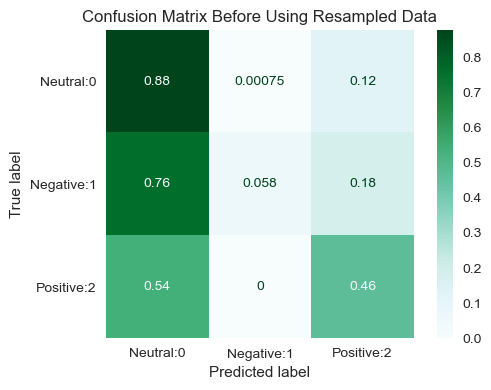


              precision    recall  f1-score   support

           0       0.69      0.88      0.77      1335
           1       0.90      0.06      0.11       155
           2       0.64      0.46      0.54       739

    accuracy                           0.68      2229
   macro avg       0.74      0.47      0.47      2229
weighted avg       0.69      0.68      0.65      2229



In [467]:
from sklearn.metrics import ConfusionMatrixDisplay

print("--Training Data--")
print("\n"+ classification_report(y_train, tfidfpipe.predict(X_train)))
print("--Test Data--")

fig, ax = plt.subplots(figsize= (6,4))
ConfusionMatrixDisplay.from_predictions(y_test, tfidfpipe.predict(X_test), ax=ax, display_labels=['Neutral:0', 'Negative:1', 'Positive:2'], normalize='true', cmap='BuGn')
plt.title("Confusion Matrix Before Using Resampled Data")
plt.grid(False)
plt.show()
print("\n"+ classification_report(y_test, tfidfpipe.predict(X_test)));

TF-IDF does better as it reduces the overfitting. We will use it moving forward

### Dealing With Class Imbalance Using Random Oversampling

To balance the class distribution, random oversampling is done by randomly duplicating examples of the minority classes in the training set.

In [107]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority', random_state=112221)

processed = pd.DataFrame(X_train)
X_train_res, y_train_res = oversample.fit_resample(processed, y_train)


In [108]:
X_train_res.shape

(12120, 1)

In [109]:
y_train.shape

(6685,)

In [110]:
# Storing for retrieval in the Grid Search Notebook
%store X_train_res

Stored 'X_train_res' (DataFrame)


In [111]:
# Storing for retrieval in the Grid Search Notebook
%store y_train_res

Stored 'y_train_res' (Series)


In [112]:
X_train_res = X_train_res.squeeze()

tfidfpipe.fit(X_train_res, y_train_res)


resampled = tfidfpipe.predict(X_test)
accuracy_score(y_test, resampled)

0.6662180349932705

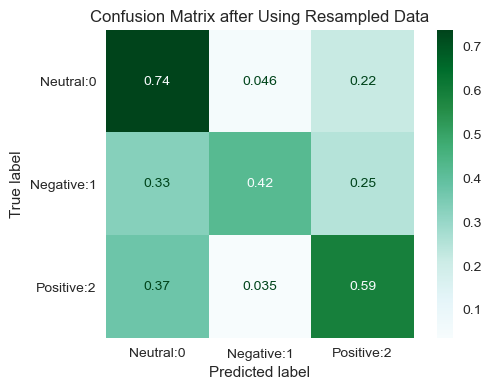

In [468]:
fig, ax = plt.subplots(figsize=(6,4))

# Plot the confusion matrix of the model using the resampled data
ConfusionMatrixDisplay.from_predictions(y_test, resampled, display_labels=['Neutral:0', 'Negative:1', 'Positive:2'], ax=ax, normalize='true', cmap='BuGn')
plt.title("Confusion Matrix after Using Resampled Data")
plt.grid(False)
plt.show()

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# Create a function to run the classification models
def run_model(models, model_type, cmap):
    '''
    Fits the model on train set, and returns the confusion matrix and accuracy scores.
    '''
    metric_table = pd.DataFrame(columns=['Model', 'CV Score', 'Train Accuracy', 'Test Accuracy', 'Type'])
    
    count = 0
    for name, model in models.items():
        print(f'Running... {name} Model')
        pipeline = Pipeline(steps=[('tfidf', tfidf), ('classifier', model['classifier'])])
        pipeline.fit(X_train_res, y_train_res) 

        cross_val = cross_val_score(pipeline, X_train_res, y_train_res, cv=3)
        cross_val_mean = round(np.mean(cross_val), 4)
        
        y_pred = pipeline.predict(X_test)
        y_train_pred = pipeline.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)

        metric_table = metric_table.append({'Model': name, 
                                            'CV Score': cross_val_mean,
                                            'Train Accuracy': round(train_accuracy,4),
                                            'Test Accuracy': round(test_accuracy, 4), 
                                            'Type': model_type}, ignore_index=True)
            

        
        print(f'Cross Validation Score: {metric_table.iloc[-1,1]}')
        print(f'Train Accuracy Score: {metric_table.iloc[-1,2]}')
        print(f'Test Accuracy Score: {metric_table.iloc[-1,3]}\n')
        
        print("Classification Report:""\n", classification_report(y_test, y_pred))

        

        fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

        ConfusionMatrixDisplay.from_predictions(y_test, pipeline.predict(X_test), display_labels=['Neutral:0', 'Negative:1', 'Positive:2'],
                                                ax=ax[0], normalize='true', cmap='BuGn')
        
        ax[0].grid(False)
        


        pred_prob = pipeline.predict_proba(X_test)
        # roc curve
        n_class = 3
        fpr={}
        tpr={}
        thresh={}
        for i in range(n_class):
            fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
        
        ax[1].plot(fpr[0], tpr[0], linestyle='--',color='red', label='Negative vs Rest')
        ax[1].plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Neutral vs Rest')
        ax[1].plot(fpr[2], tpr[2], linestyle='--',color='green', label='Positive vs Rest')
        ax[1].set_title('Multiclass ROC curve')
        ax[1].set_xlabel('False Positive Rate')
        ax[1].set_ylabel('True Positive rate')
        ax[1].legend(loc='best')
    
        #Plotting the 50-50 guessing plot for reference
        ax[1].plot([0,1], [0,1], ls='--', color='orange')

        plt.show()
        
    count += 1
    
    return metric_table

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Default parameters
default_models = {'LogisticRegression': {'classifier': LogisticRegression(max_iter=1000, random_state=42)}, 
                   'MultinomialNB': {'classifier': MultinomialNB()},
                   'DecisionTree': {'classifier': DecisionTreeClassifier(random_state= 42)},
                   'GradientBoost': {'classifier': GradientBoostingClassifier(random_state=42)},
                   'VectorClass': {'classifier': SVC(random_state=42, probability=True)},
                   'SGDClassifier': {'classifier': SGDClassifier(random_state=42, loss='log_loss')}}

In [116]:
# Store for retrieval at grid search notebook
%store default_models

Stored 'default_models' (dict)


Running... LogisticRegression Model
Cross Validation Score: 0.832
Train Accuracy Score: 0.9282
Test Accuracy Score: 0.6662

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      1335
           1       0.42      0.42      0.42       155
           2       0.57      0.59      0.58       739

    accuracy                           0.67      2229
   macro avg       0.58      0.58      0.58      2229
weighted avg       0.67      0.67      0.67      2229



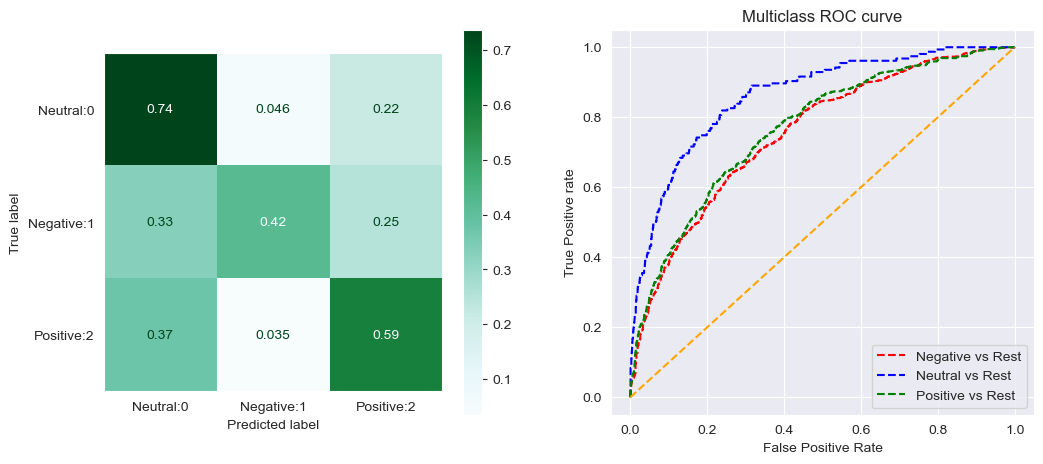

Running... MultinomialNB Model
Cross Validation Score: 0.7932
Train Accuracy Score: 0.9004
Test Accuracy Score: 0.6178

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69      1335
           1       0.30      0.61      0.40       155
           2       0.55      0.61      0.58       739

    accuracy                           0.62      2229
   macro avg       0.54      0.61      0.55      2229
weighted avg       0.66      0.62      0.63      2229



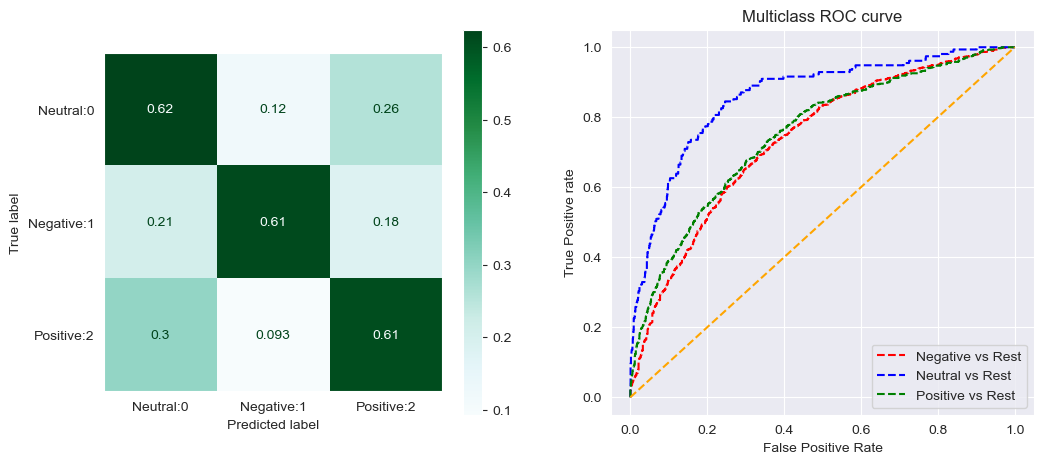

Running... DecisionTree Model
Cross Validation Score: 0.8083
Train Accuracy Score: 0.958
Test Accuracy Score: 0.5989

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68      1335
           1       0.27      0.43      0.33       155
           2       0.51      0.56      0.53       739

    accuracy                           0.60      2229
   macro avg       0.50      0.54      0.52      2229
weighted avg       0.63      0.60      0.61      2229



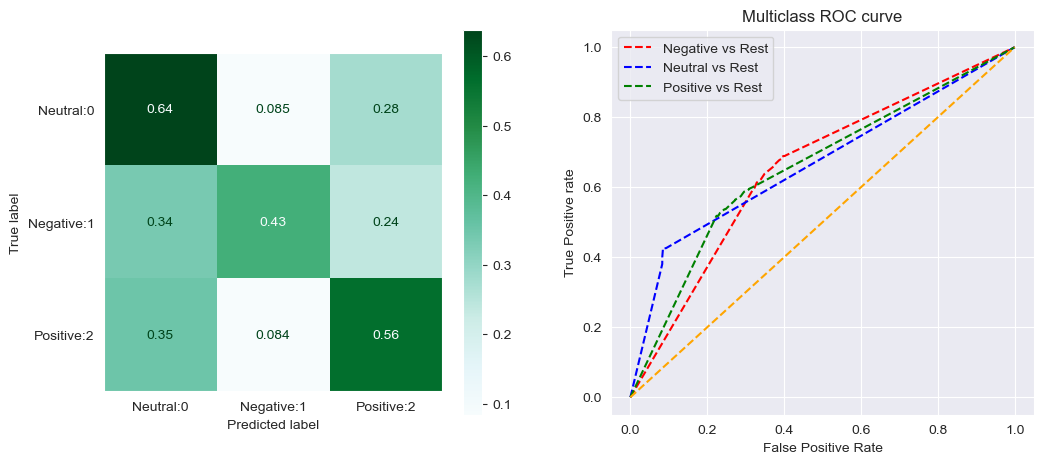

Running... GradientBoost Model
Cross Validation Score: 0.6453
Train Accuracy Score: 0.7225
Test Accuracy Score: 0.6101

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      1335
           1       0.28      0.43      0.34       155
           2       0.54      0.47      0.50       739

    accuracy                           0.61      2229
   macro avg       0.51      0.54      0.51      2229
weighted avg       0.62      0.61      0.61      2229



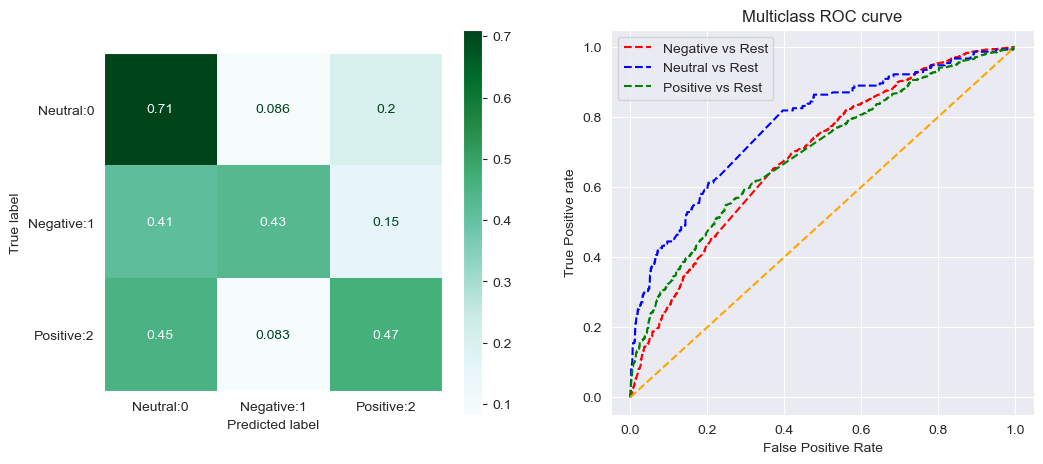

Running... VectorClass Model
Cross Validation Score: 0.8624
Train Accuracy Score: 0.9478
Test Accuracy Score: 0.6774

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76      1335
           1       0.65      0.23      0.34       155
           2       0.61      0.50      0.55       739

    accuracy                           0.68      2229
   macro avg       0.66      0.52      0.55      2229
weighted avg       0.67      0.68      0.66      2229



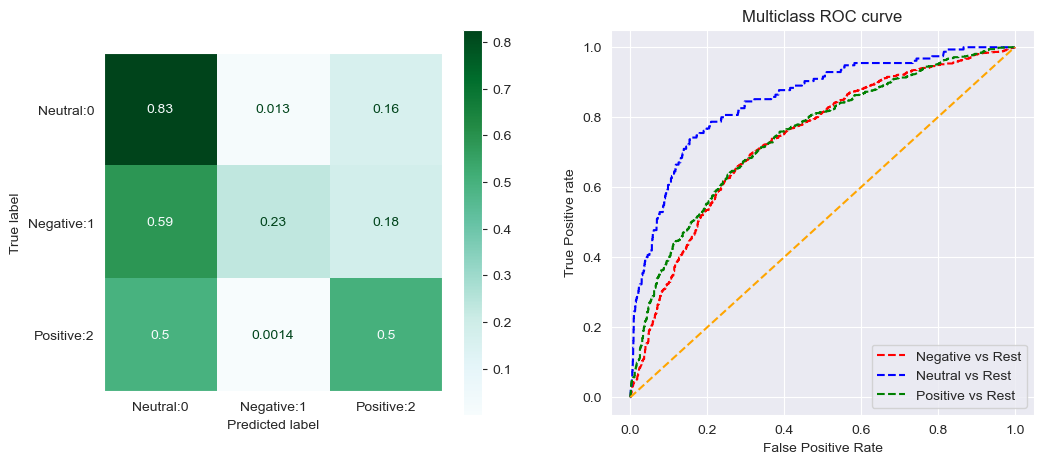

Running... SGDClassifier Model
Cross Validation Score: 0.8258
Train Accuracy Score: 0.9053
Test Accuracy Score: 0.6577

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      1335
           1       0.39      0.48      0.43       155
           2       0.57      0.58      0.58       739

    accuracy                           0.66      2229
   macro avg       0.57      0.59      0.58      2229
weighted avg       0.66      0.66      0.66      2229



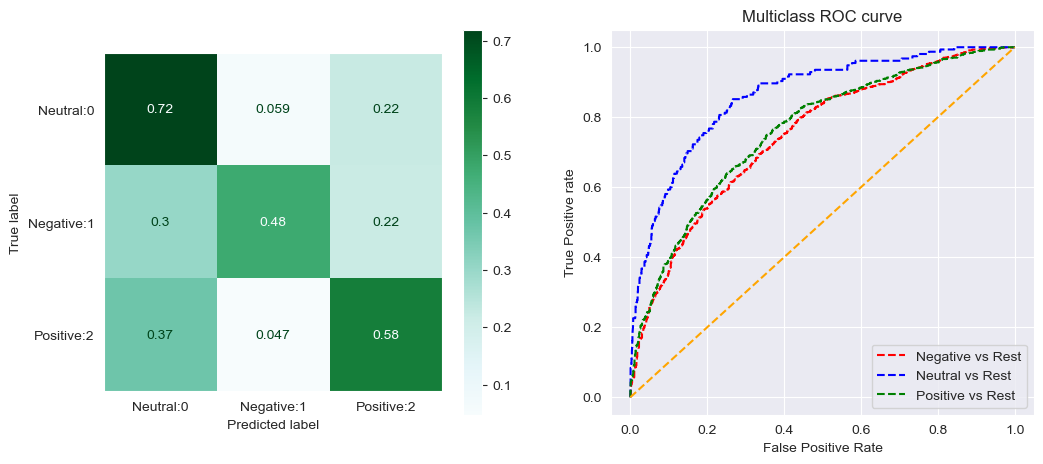

,Model,CV Score,Train Accuracy,Test Accuracy,Type
0,LogisticRegression,0.8320,0.9282,0.6662,Default
1,MultinomialNB,0.7932,0.9004,0.6178,Default
2,DecisionTree,0.8083,0.9580,0.5989,Default
3,GradientBoost,0.6453,0.7225,0.6101,Default
4,VectorClass,0.8624,0.9478,0.6774,Default
5,SGDClassifier,0.8258,0.9053,0.6577,Default


In [117]:
default_metrics = run_model(default_models, 'Default', 'Blues')
default_metrics

# TUNING ALL THE MODELS

Model tuning was done in the [Grid Search CV notebook.](https://github.com/KImondorose/phase_4_project/blob/main/work_in_progress/grid_search_cv_rose.ipynb)

### Implementing Hyperparameter Tuning

In [118]:
def optimize_model(models, classifier, classifier_name, params):
    '''
    Uses optimal parameters from grid search to tune model's hyperparameters.
    '''
    best_params = {}
    
    for param, values in params.items():
        parameter = param.replace('classifier__', '')
        best_params[parameter] = values
        
    models[classifier_name]['classifier'] = classifier(**best_params)

In [119]:
tuned_models = default_models.copy()

### Logistic Regression

In [120]:
# Retrieving from the Grid Search Notebook
%store -r lr_best_params

In [121]:
optimize_model(tuned_models, LogisticRegression, 'LogisticRegression', lr_best_params)

### Multinomial Naive Bayes

In [122]:
# Retrieving from the Grid Search Notebook
%store -r mn_best_params

In [123]:
optimize_model(tuned_models, MultinomialNB, 'MultinomialNB', mn_best_params)

### Decision Tree

In [124]:
# Retrieving from the Grid Search Notebook
%store -r dt_best_params

In [125]:
optimize_model(tuned_models, DecisionTreeClassifier, 'DecisionTree', dt_best_params)

### GradientBoost

In [126]:
# Retrieving from the Grid Search Notebook
%store -r gb_best_params

In [127]:

optimize_model(tuned_models, GradientBoostingClassifier, 'GradientBoost', gb_best_params)

### Vector Class

In [128]:
# Retrieving from the Grid Search Notebook
%store -r svc_best_params

In [129]:

optimize_model(tuned_models, SVC, 'VectorClass', svc_best_params)

### SDG

In [130]:
# Retrieving from the Grid Search Notebook
%store -r sgd_best_params

In [131]:
optimize_model(tuned_models, SGDClassifier, 'SGDClassifier', sgd_best_params)

In [132]:
tuned_models['VectorClass'] = {'classifier': SVC(C=1, degree = 1, random_state=42, probability=True )} 
tuned_models['SGDClassifier'] = {'classifier': SGDClassifier(loss='log_loss', random_state= 42)}
tuned_models

{'LogisticRegression': {'classifier': LogisticRegression(C=1)},
 'MultinomialNB': {'classifier': MultinomialNB(alpha=0.2)},
 'DecisionTree': {'classifier': DecisionTreeClassifier(criterion='entropy', splitter='random')},
 'GradientBoost': {'classifier': GradientBoostingClassifier()},
 'VectorClass': {'classifier': SVC(C=1, degree=1, probability=True, random_state=42)},
 'SGDClassifier': {'classifier': SGDClassifier(loss='log_loss', random_state=42)}}

Running... LogisticRegression Model


c:\Users\rosew\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\rosew\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Cross Validation Score: 0.832
Train Accuracy Score: 0.9282
Test Accuracy Score: 0.6662

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      1335
           1       0.42      0.42      0.42       155
           2       0.57      0.59      0.58       739

    accuracy                           0.67      2229
   macro avg       0.58      0.58      0.58      2229
weighted avg       0.67      0.67      0.67      2229



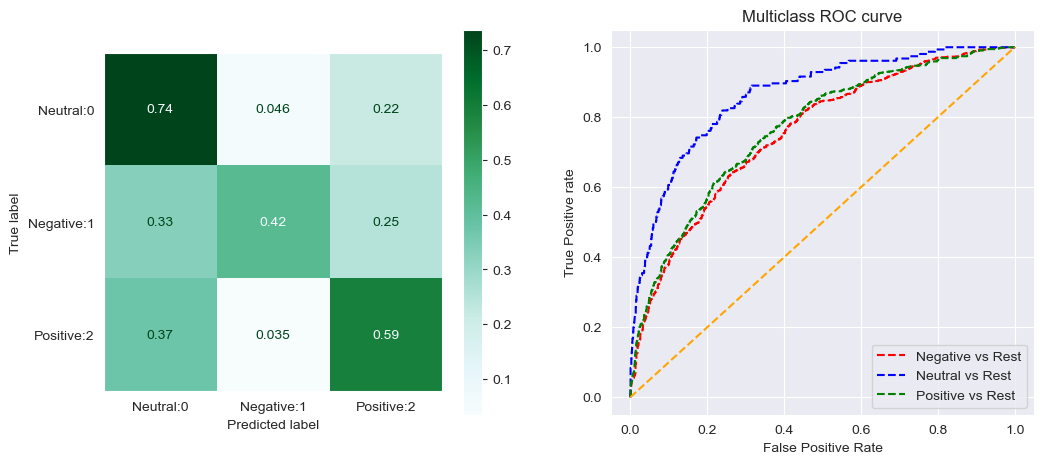

Running... MultinomialNB Model
Cross Validation Score: 0.8169
Train Accuracy Score: 0.9264
Test Accuracy Score: 0.6375

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      1335
           1       0.34      0.50      0.41       155
           2       0.55      0.60      0.57       739

    accuracy                           0.64      2229
   macro avg       0.55      0.59      0.56      2229
weighted avg       0.66      0.64      0.64      2229



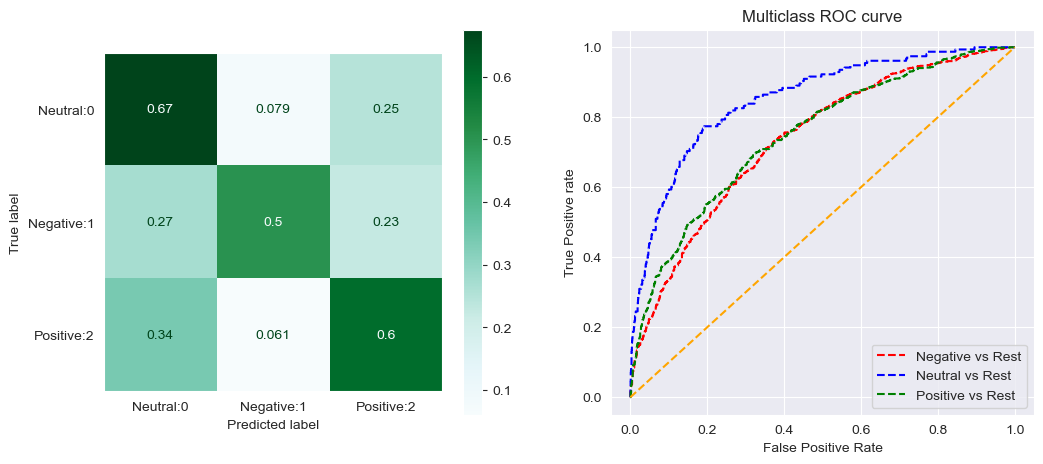

Running... DecisionTree Model
Cross Validation Score: 0.8167
Train Accuracy Score: 0.958
Test Accuracy Score: 0.6182

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.70      1335
           1       0.35      0.37      0.36       155
           2       0.51      0.55      0.53       739

    accuracy                           0.62      2229
   macro avg       0.53      0.54      0.53      2229
weighted avg       0.62      0.62      0.62      2229



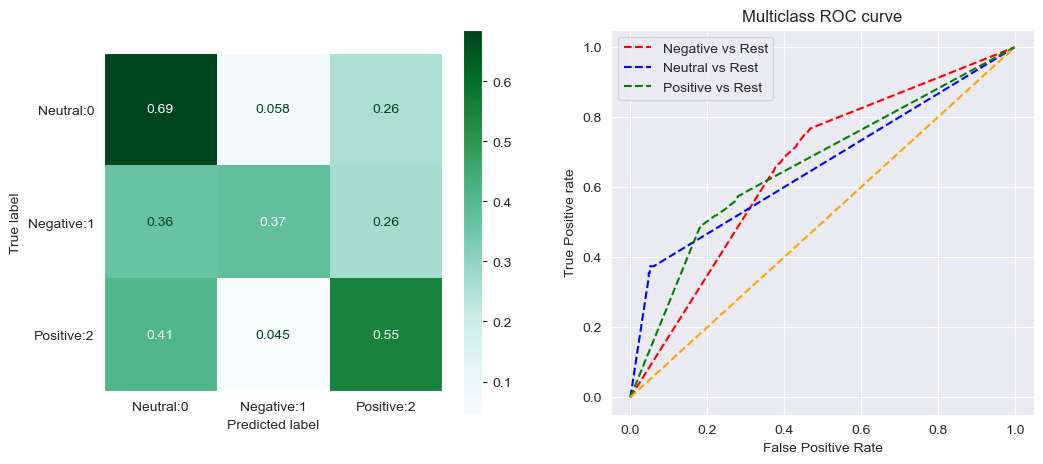

Running... GradientBoost Model
Cross Validation Score: 0.6465
Train Accuracy Score: 0.7233
Test Accuracy Score: 0.6092

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      1335
           1       0.27      0.43      0.34       155
           2       0.54      0.46      0.50       739

    accuracy                           0.61      2229
   macro avg       0.51      0.54      0.51      2229
weighted avg       0.62      0.61      0.61      2229



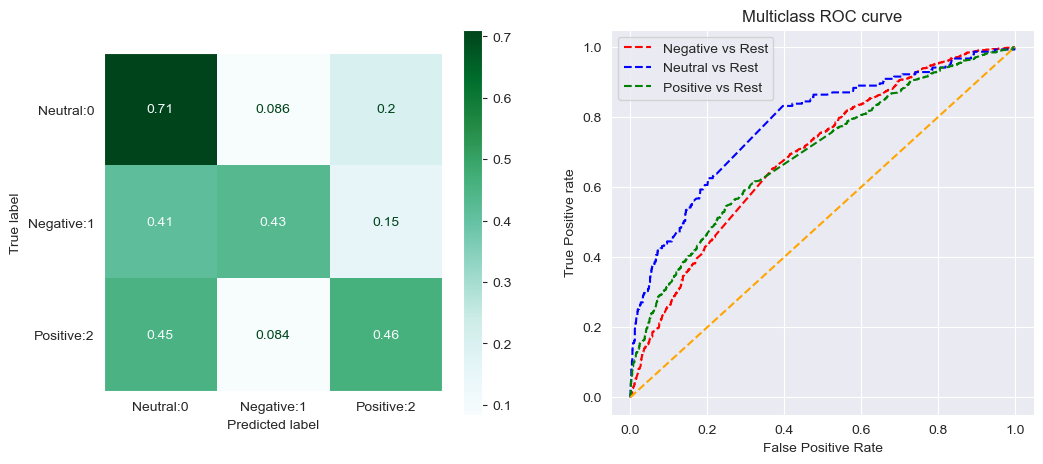

Running... VectorClass Model
Cross Validation Score: 0.8624
Train Accuracy Score: 0.9478
Test Accuracy Score: 0.6774

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76      1335
           1       0.65      0.23      0.34       155
           2       0.61      0.50      0.55       739

    accuracy                           0.68      2229
   macro avg       0.66      0.52      0.55      2229
weighted avg       0.67      0.68      0.66      2229



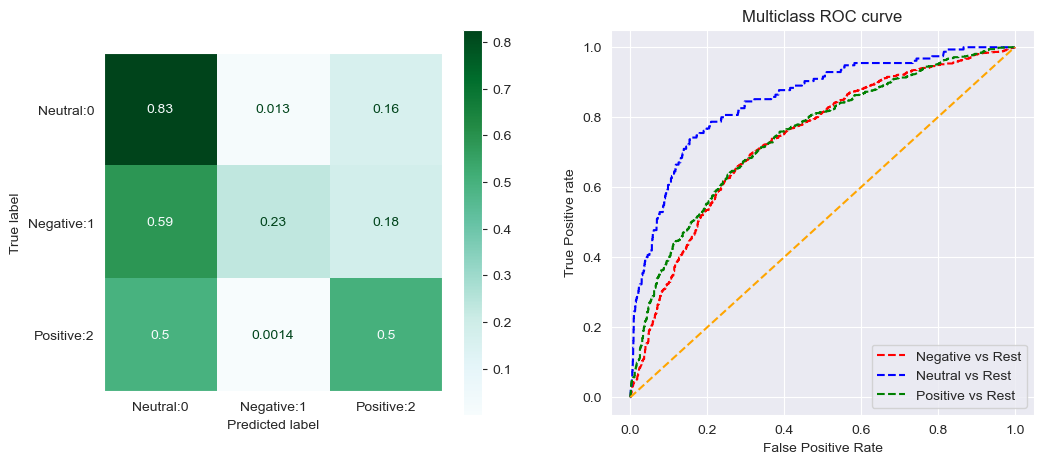

Running... SGDClassifier Model
Cross Validation Score: 0.8258
Train Accuracy Score: 0.9053
Test Accuracy Score: 0.6577

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      1335
           1       0.39      0.48      0.43       155
           2       0.57      0.58      0.58       739

    accuracy                           0.66      2229
   macro avg       0.57      0.59      0.58      2229
weighted avg       0.66      0.66      0.66      2229



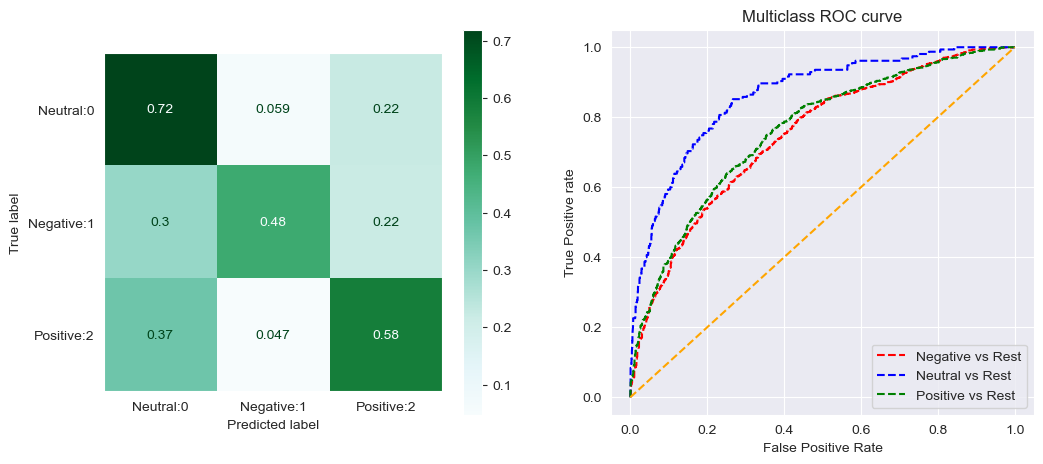

,Model,CV Score,Train Accuracy,Test Accuracy,Type
0,LogisticRegression,0.8320,0.9282,0.6662,Tuned
1,MultinomialNB,0.8169,0.9264,0.6375,Tuned
2,DecisionTree,0.8167,0.9580,0.6182,Tuned
3,GradientBoost,0.6465,0.7233,0.6092,Tuned
4,VectorClass,0.8624,0.9478,0.6774,Tuned
5,SGDClassifier,0.8258,0.9053,0.6577,Tuned


In [133]:
tuned_metrics = run_model(tuned_models, 'Tuned', 'Purples')
tuned_metrics

# RESULTS AND RECOMMENDATION

## Model Performance:

In [134]:
all_models = pd.concat([default_metrics, tuned_metrics], ignore_index=True)

all_models


,Model,CV Score,Train Accuracy,Test Accuracy,Type
0,LogisticRegression,0.8320,0.9282,0.6662,Default
1,MultinomialNB,0.7932,0.9004,0.6178,Default
2,DecisionTree,0.8083,0.9580,0.5989,Default
3,GradientBoost,0.6453,0.7225,0.6101,Default
4,VectorClass,0.8624,0.9478,0.6774,Default
5,SGDClassifier,0.8258,0.9053,0.6577,Default
6,LogisticRegression,0.8320,0.9282,0.6662,Tuned
7,MultinomialNB,0.8169,0.9264,0.6375,Tuned
8,DecisionTree,0.8167,0.9580,0.6182,Tuned
9,GradientBoost,0.6465,0.7233,0.6092,Tuned


,Model,CV Score,Train Accuracy,Test Accuracy,Type,accuracy_differences
0,LogisticRegression,0.8320,0.9282,0.6662,Default,0.2620
1,MultinomialNB,0.7932,0.9004,0.6178,Default,0.2826
2,DecisionTree,0.8083,0.9580,0.5989,Default,0.3591
3,GradientBoost,0.6453,0.7225,0.6101,Default,0.1124
4,VectorClass,0.8624,0.9478,0.6774,Default,0.2704
5,SGDClassifier,0.8258,0.9053,0.6577,Default,0.2476
6,LogisticRegression,0.8320,0.9282,0.6662,Tuned,0.2620
7,MultinomialNB,0.8169,0.9264,0.6375,Tuned,0.2889
8,DecisionTree,0.8167,0.9580,0.6182,Tuned,0.3398
9,GradientBoost,0.6465,0.7233,0.6092,Tuned,0.1141


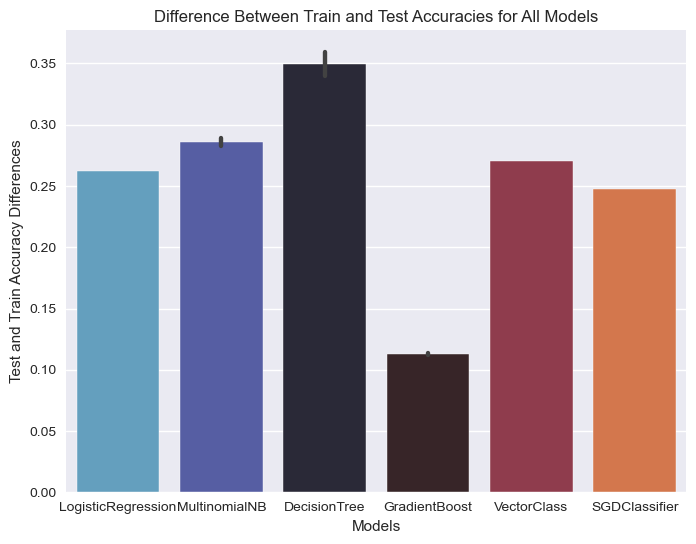

In [163]:

import seaborn as sns
all_models['accuracy_differences'] = all_models['Train Accuracy'] - all_models['Test Accuracy']

plt.figure(figsize = (8,6))

bp_accuracies = sns.barplot(data=all_models, x = all_models['Model'], y = all_models['accuracy_differences'], palette='icefire')
bp_accuracies.set_ylabel('Test and Train Accuracy Differences')
bp_accuracies.set_xlabel('Models')
bp_accuracies.set_title("Difference Between Train and Test Accuracies for All Models");
all_models


From the visualization above, initial the Gradient Boost model is the least overfit since it has the least difference between the train and test data (0.1124). 

Comparing the earlier confusion matrices of the models above, the final model that I chose for this problem is the original GradientBoost model. Even though the VectorClass model has the highest test accuracy score and the Multinomial Naive Bayes models have better true negative and true positive rates, they are extremely overfit and therefore, do not generalize well to real world data. It is important that our model performs well when presented with data that it has not yet seen. The true positive and negative rates of our final model are also somewhat high, which is indicates good overall performance.

- The misclassification of the negative sentiments can be more costly to the conference organizers and companies featured at the events if more negative sentiments are spread online and missed.
- The correct classification of positive sentiments can be more beneficial to understand and provide satisfaction to the attendees. 

The **Final Model** has a True Negatives value of 0.43 and a True Positives value of 0.47, Also, it has an accuracy score of 62% and only misclassifies 15% of the negative sentiments as positive. 

In [136]:
final = Pipeline(steps=[('tfifd', tfidf), ('final_model', GradientBoostingClassifier(random_state=42))])
# an alpha level of 0.2 was the optimal one after tuning
final.fit(X_train_res, y_train_res)

final_pred = final.predict(X_test)
accuracy_score(y_test, final_pred)

0.6101390758187528

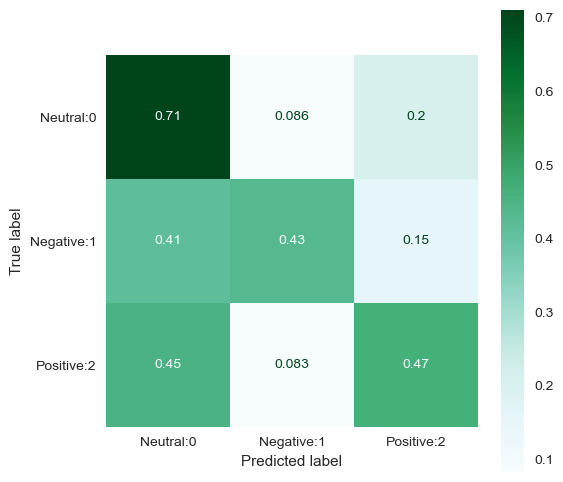

In [137]:

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(6,6))


# plot the confusion matrix of the final model

ConfusionMatrixDisplay.from_predictions(y_test, final.predict(X_test), display_labels=['Neutral:0', 'Negative:1', 'Positive:2'],
                                                ax=ax, normalize='true', cmap='BuGn')
        
ax.grid(False)
plt.show()

## Recommendations

The model is recommended for use since it is fairly accurate in classifying tweet sentiments, especially compared to doing so by hand. As a result, Apple's product team can use this sentiment analyzer to target neutral consumers and convert them to buyers.

While the model improved from the first iteration, it still does not distinguish non-neutral tweets from neutral ones very well. Furthermore, the sentiment analysis only looked at tweets, while consumers post about Apple from other platforms as well. 

Moving forward, it would be interesting to try and implement sentiment anaylysis from other platforms as well to gauge consumers. 

Also, having more explicit sentiment labels could provide more insight into the customers' sentiments.

# FURTHER RESEARCH

For further research, the data should be updated with more recent tweets, and more advanced models should be explored, such as the recent transformers.